# Project 3 : Python

## Study Objective:

### The goal of this analysis is to study Walmart customers' purchasing behavior based on their transactions, demographic characteristics, and preferences. Through this study, we aim to:¶

- Identify customer profiles that spend the most based on age, gender, and location.
- Analyze the frequency of purchases and the most popular product categories.
- Examine sales trends over time (daily, weekly, monthly) to identify sales peaks and seasonal trends.
- Determine whether discounts and payment methods influence purchase amounts.
- Assess the impact of customer ratings on purchase recurrence.
- Study the average purchase value per customer and customer loyalty (repeat_customer).
- Understand the factors influencing repeat purchases and customer retention.

The ultimate objective is to detect trends, optimize sales strategies, and enhance the customer experience based on the collected data.

## Preparing the Data for analysis

- We import the necessary libraries to manipulate data, perform statistical analysis, and visualize results. This will allow us to explore our dataset and extract meaningful insights.

In [2]:
import pandas as pd       
import numpy as np         
import matplotlib.pyplot as plt  
import seaborn as sb      
import datetime as dt

- We import the datasets containing customer transactions and product categories to analyze them in the next steps.

In [3]:
wp = pd.read_csv("walmart_purchases.csv") 
categories= pd.read_csv("categories.csv")

- I will verify that the databases have been imported correctly by using the head() function.

In [5]:
wp.head() #The head() function displays the first few rows of the dataset, allowing us to quickly check if the data has been imported correctly.

,Customer_ID,Age,Gender,City,CategoryID,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,1,Smartphone,30/08/2024,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,2,T-Shirt,21/12/2024,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,3,Perfume,26/12/2024,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,1,Smartwatch,04/11/2024,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,1,Smartphone,07/10/2024,369.28,Credit Card,Yes,2,Yes


In [6]:
categories.head()

,CategoryID,CategoryName
0,1,Electronics
1,2,Clothing
2,3,Beauty
3,4,Home


## Explanation of Columns:

Main Dataset: wp (walmart_purchases.csv)

- customer_id: A unique identifier for each customer.
- age: The age of the customer.
- gender: The gender of the customer (Male/Female).
- city: The city where the purchase was made.
- category_id: The ID of the product category (linked to categories.csv).
- product_name: The name of the purchased product.
- purchase_date: The date when the purchase was made.
- purchase_amount: The total amount spent on the purchase.
- payment_method: The method of payment used (Card, Cash, etc.).
- discount: The discount applied to the purchase.
- rating: The rating given by the customer for the product.
- repeat_customer: Indicates whether the customer is a returning customer (Yes/No).

Category Dataset: categories (categories.csv)

- category_id: A unique identifier for each product category.
- category_name: The name of the product category (e.g., Electronics, Clothing, etc.).

In [7]:
#To understand the structure of the dataset, I will use the info() function to display the column names, data types, and the number of non-null values in wp.
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       49995 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   CategoryID        50000 non-null  int64  
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   49882 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


The dataset contains 50,000 rows and 12 columns. Some key observations:

Customer_ID has 5 missing values.
Purchase_Amount has 118 missing values.
Purchase_Date is stored as an object and needs to be converted to a proper datetime format.
Discount_Applied is an object type, so we need to check whether it contains numerical or categorical values.


In [8]:
#Before analyzing the data, I need to prepare and clean it. One important step is handling missing values.
#In the Customer_ID column, there are 5 missing values. Instead of deleting these rows, I will replace the missing values with unique identifiers (Unknown1, Unknown2, etc.), so each missing entry remains distinct.
#Replacing these missing values does not impact the analysis, as Customer_ID is only an identifier and does not influence the actual purchase data.

missing_ID = wp[wp['Customer_ID'].isnull()].index

In [9]:
missing_ID

Index([59, 80, 102, 127, 224], dtype='int64')

In [10]:
unknown_values = [f'Unknown{i+1}' for i in range(len(missing_ID))]
wp.loc[missing_ID, 'Customer_ID'] = wp.loc[missing_ID, 'Customer_ID'].fillna(pd.Series(unknown_values, index=missing_ID))
wp.loc[missing_ID]

,Customer_ID,Age,Gender,City,CategoryID,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
59,Unknown1,56,Male,Davisburgh,2,Jacket,15/06/2024,362.40,Debit Card,Yes,2,No
80,Unknown2,54,Male,Jamesville,4,Sofa Cover,10/08/2024,455.79,Credit Card,Yes,3,Yes
102,Unknown3,20,Female,New Jeffrey,1,Smartphone,24/08/2024,463.09,Cash on Delivery,No,5,No
127,Unknown4,18,Male,New Joseph,1,Smartwatch,03/09/2024,298.27,Credit Card,Yes,3,Yes
224,Unknown5,46,Female,East Kylestad,2,Jeans,30/06/2024,344.04,UPI,Yes,3,Yes


In [11]:
#Apart from Customer_ID, there are very few missing values in the dataset, specifically in the Purchase_Amount column (118 missing values out of 50,000). 
#Since this represents only 0.24% of the data, removing these rows will have a negligible impact on the analysis.

#To ensure data consistency and avoid complications in further analysis, I will drop these rows from the dataset.
wp.dropna(inplace=True)  #Remove rows with missing values in any column
print(wp.isnull().sum()) #Verify that there are no more missing values

Customer_ID         0
Age                 0
Gender              0
City                0
CategoryID          0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64


In [12]:
wp.info()
#This ensures that only complete data is retained for analysis.

<class 'pandas.core.frame.DataFrame'>
Index: 49882 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       49882 non-null  object 
 1   Age               49882 non-null  int64  
 2   Gender            49882 non-null  object 
 3   City              49882 non-null  object 
 4   CategoryID        49882 non-null  int64  
 5   Product_Name      49882 non-null  object 
 6   Purchase_Date     49882 non-null  object 
 7   Purchase_Amount   49882 non-null  float64
 8   Payment_Method    49882 non-null  object 
 9   Discount_Applied  49882 non-null  object 
 10  Rating            49882 non-null  int64  
 11  Repeat_Customer   49882 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.9+ MB


The Purchase_Date column is currently stored as an object (string), which prevents proper date-based analysis.

To fix this, I will convert Purchase_Date into a datetime format. This will allow me to perform time-based analyses, such as tracking sales trends over different periods.

In [13]:
wp['Purchase_Date'] = pd.to_datetime(wp['Purchase_Date'], format='%d/%m/%Y')
#Now, Purchase_Date is correctly formatted, enabling further time-based analyses.

wp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49882 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       49882 non-null  object        
 1   Age               49882 non-null  int64         
 2   Gender            49882 non-null  object        
 3   City              49882 non-null  object        
 4   CategoryID        49882 non-null  int64         
 5   Product_Name      49882 non-null  object        
 6   Purchase_Date     49882 non-null  datetime64[ns]
 7   Purchase_Amount   49882 non-null  float64       
 8   Payment_Method    49882 non-null  object        
 9   Discount_Applied  49882 non-null  object        
 10  Rating            49882 non-null  int64         
 11  Repeat_Customer   49882 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.9+ MB


In [14]:
#Before conducting further analysis, it is important to check the consistency of categorical values to ensure data quality.

# - The Gender, Payment_Method, and Repeat_Customer columns should have consistent categories. Any variations in spelling or formatting (e.g., Male, M, or yes, Yes) could lead to incorrect analysis.
# - The Customer_ID column must be checked for duplicates, as each customer should have a unique identifier.
# This step helps to detect and correct potential inconsistencies, ensuring more reliable results in the analysis.

print("Unique values in Gender:", wp['Gender'].unique())
print("Unique values in Payment_Method:", wp['Payment_Method'].unique())
print("Unique values in Repeat_Customer:", wp['Repeat_Customer'].unique())
print("Number of duplicate Customer_IDs:", wp['Customer_ID'].duplicated().sum())

Unique values in Gender: ['Female' 'Other' 'Male']
Unique values in Payment_Method: ['Cash on Delivery' 'Debit Card' 'Credit Card' 'UPI']
Unique values in Repeat_Customer: ['Yes' 'No']
Number of duplicate Customer_IDs: 0


In [15]:
#Since no inconsistencies were found, we can proceed with merging the datasets and further exploration.

In [16]:
#Before making any changes to the Gender column, I will check how many occurrences of "Other" exist in the dataset. 
#If "Other" is a rare category, it may be beneficial to merge it with "Unknown" to simplify the analysis. 
#Otherwise, I will keep it as a distinct value.

gender_counts = wp['Gender'].value_counts()
gender_counts

Gender
Other     16717
Male      16603
Female    16562
Name: count, dtype: int64

In [17]:
#After checking the distribution of the Gender column, I found that "Other" represents a significant portion of the dataset (16,717 occurrences, approximately 33.4%). 
#Since it is not a rare category, I will keep it as a separate value rather than merging it with "Unknown". 
#This ensures that the data remains accurate and no information is lost.

In [19]:
#To improve readability, I am merging the wp dataset with categories.csv using the CategoryID column.
#This will replace the numeric category identifier with the actual category name (Category_Name).

#After merging, the CategoryID column is no longer needed, so I will remove it. 
#This ensures that the data is more understandable for further analysis.

wp = wp.merge(categories, on='CategoryID', how='left')
wp.drop(columns=['CategoryID'], inplace=True)

In [20]:
wp.head()

,Customer_ID,Age,Gender,City,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer,CategoryName_x,CategoryName_y
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes,Electronics,Electronics
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No,Clothing,Clothing
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No,Beauty,Beauty
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes,Electronics,Electronics
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes,Electronics,Electronics


In [21]:
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49882 entries, 0 to 49881
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       49882 non-null  object        
 1   Age               49882 non-null  int64         
 2   Gender            49882 non-null  object        
 3   City              49882 non-null  object        
 4   Product_Name      49882 non-null  object        
 5   Purchase_Date     49882 non-null  datetime64[ns]
 6   Purchase_Amount   49882 non-null  float64       
 7   Payment_Method    49882 non-null  object        
 8   Discount_Applied  49882 non-null  object        
 9   Rating            49882 non-null  int64         
 10  Repeat_Customer   49882 non-null  object        
 11  CategoryName_x    49882 non-null  object        
 12  CategoryName_y    49882 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 4.9+ MB


In [22]:
#After merging the datasets, I noticed that two CategoryName columns were created (CategoryName_x and CategoryName_y). 
#This happens when the column name already exists in both datasets. 
#To fix this, I kept one column and renamed it to CategoryName, ensuring that the data remains clean.

wp.drop(columns=['CategoryName_y'], inplace=True)
wp.rename(columns={'CategoryName_x': 'CategoryName'}, inplace=True)

In [23]:
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49882 entries, 0 to 49881
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       49882 non-null  object        
 1   Age               49882 non-null  int64         
 2   Gender            49882 non-null  object        
 3   City              49882 non-null  object        
 4   Product_Name      49882 non-null  object        
 5   Purchase_Date     49882 non-null  datetime64[ns]
 6   Purchase_Amount   49882 non-null  float64       
 7   Payment_Method    49882 non-null  object        
 8   Discount_Applied  49882 non-null  object        
 9   Rating            49882 non-null  int64         
 10  Repeat_Customer   49882 non-null  object        
 11  CategoryName      49882 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 4.6+ MB


In [24]:
#Before diving into visualizations, I will perform an exploratory data analysis (EDA) to understand key patterns in the dataset. 
#This includes summarizing numerical data, analyzing product categories, checking sales trends over time, and understanding the customer age distribution.

wp.describe()

,Age,Purchase_Date,Purchase_Amount,Rating
count,49882.000000,49882,49882.000000,49882.000000
mean,38.947276,2024-08-10 18:27:40.206086144,255.510157,2.998617
min,18.000000,2024-02-10 00:00:00,10.010000,1.000000
25%,28.000000,2024-05-11 00:00:00,132.975000,2.000000
50%,39.000000,2024-08-11 00:00:00,255.030000,3.000000
75%,50.000000,2024-11-10 00:00:00,378.855000,4.000000
max,60.000000,2025-02-09 00:00:00,499.990000,5.000000
std,12.399540,NaN,141.588279,1.417972


In [25]:
#The dataset contains 49,882 transactions spanning from February 2024 to February 2025.
#Customer Age Distribution: The majority of customers are between 28 and 50 years old, with an average age of 38.95.
#Sales Trend Over Time: The transactions cover a full year, allowing for seasonal trend analysis.
#Purchase Amounts: The average purchase value is 255.51, with transactions ranging from 10.01 to 499.99.
#Product Ratings: The average rating is 3/5, showing a neutral trend, with a diverse distribution of reviews.


## Analyze Data & Visualizations

### 1: Frequency of Purchases by Product Category

Understanding which product categories are the most frequently purchased helps identify customer preferences. This insight can be used to optimize stock levels, marketing strategies, and product recommendations.

I will count the number of purchases for each product category using value_counts().
Then, I will visualize the results with a bar chart to see which categories dominate sales.

In [35]:
category_counts = wp['CategoryName'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
category_counts

,Category,Count
0,Electronics,12614
1,Home,12455
2,Beauty,12423
3,Clothing,12390


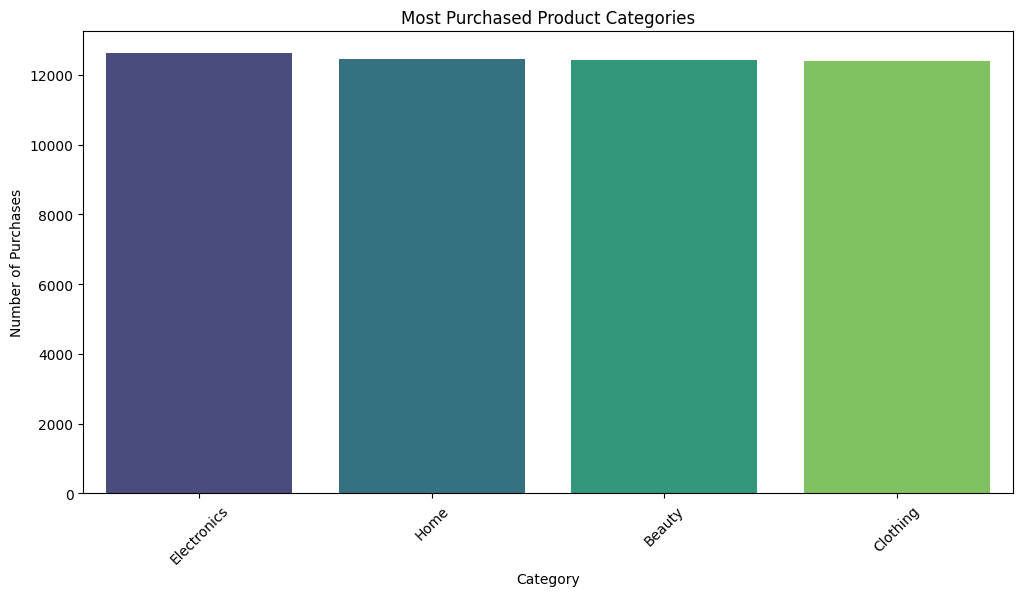

In [34]:
plt.figure(figsize=(12, 6))
sb.barplot(x="Category", y="Count", hue="Category", data=category_counts, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Number of Purchases")
plt.title("Most Purchased Product Categories")
plt.show()

In [36]:
#The bar chart shows the number of purchases for each product category. 
#The data reveals that Electronics is the most frequently purchased category, with 12,614 purchases, followed closely by Home (12,455), Beauty (12,423), and Clothing (12,390).

#Electronics is the top category, but the difference between categories is minimal.
#Home, Beauty, and Clothing have nearly the same number of purchases, indicating a balanced distribution of customer interests across these categories.
#Since no single category dominates significantly, Walmart may have a diverse customer base with varied shopping preferences.
#Conclusion: The results suggest that customers shop almost equally across different product categories, meaning all categories are important for revenue generation. 
#Future analysis could explore which category generates the highest revenue, as purchase count does not necessarily indicate profitability.

### Step 2: Sales Trends Over Time

In [38]:
#To analyze sales trends over time, I added a Month column by extracting the month from Purchase_Date. 
#This will allow me to group and visualize sales on a monthly basis.

wp['Month'] = wp['Purchase_Date'].dt.strftime('%Y-%m')
wp[['Purchase_Date', 'Month']].head()

,Purchase_Date,Month
0,2024-08-30,2024-08
1,2024-12-21,2024-12
2,2024-12-26,2024-12
3,2024-11-04,2024-11
4,2024-10-07,2024-10


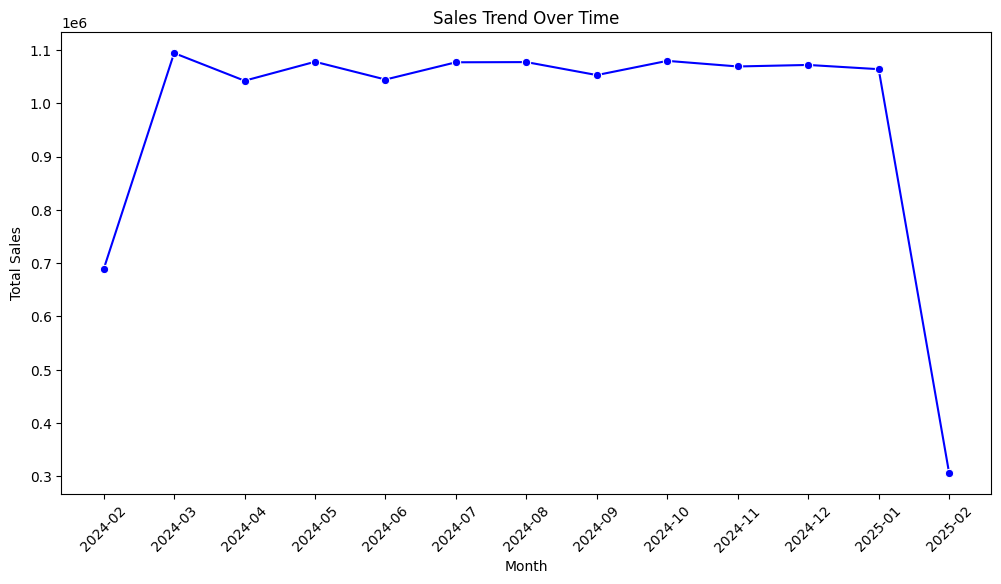

In [39]:
#Understanding how sales fluctuate over time helps identify trends, peak shopping periods, and potential seasonal effects. 
#This can be useful for inventory management, marketing campaigns, and business strategy adjustments.

#I will group sales by month using groupby('Month').agg({'Purchase_Amount': 'sum'}) to calculate the total revenue per month.
#Then, I will create a line chart to visualize sales trends over time.
monthly_sales = wp.groupby('Month')['Purchase_Amount'].sum().reset_index()
plt.figure(figsize=(12, 6))
sb.lineplot(x=monthly_sales['Month'], y=monthly_sales['Purchase_Amount'], marker="o", color='b')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.show()

In [41]:
#The line chart represents the total sales revenue per month over the analyzed period.
#February 2024 has the lowest total sales (688,801.73), likely because it is a partial month in the dataset.
#March 2024 shows a significant increase (1,094,184.67), making it the highest sales month.
#From April to January, sales remain relatively stable, fluctuating between 1,042,295 and 1,079,570, indicating a consistent demand.
#February 2025 has significantly lower sales (306,110.18), which could be due to incomplete data for that month.
#Conclusion:
#The overall trend shows stable sales after March, with no extreme variations. 
#The sales drop in February 2025 suggests that this month is incomplete in the dataset and should not be misinterpreted as a decline in sales performance.

## Step 3: Average Purchase Value per Customer

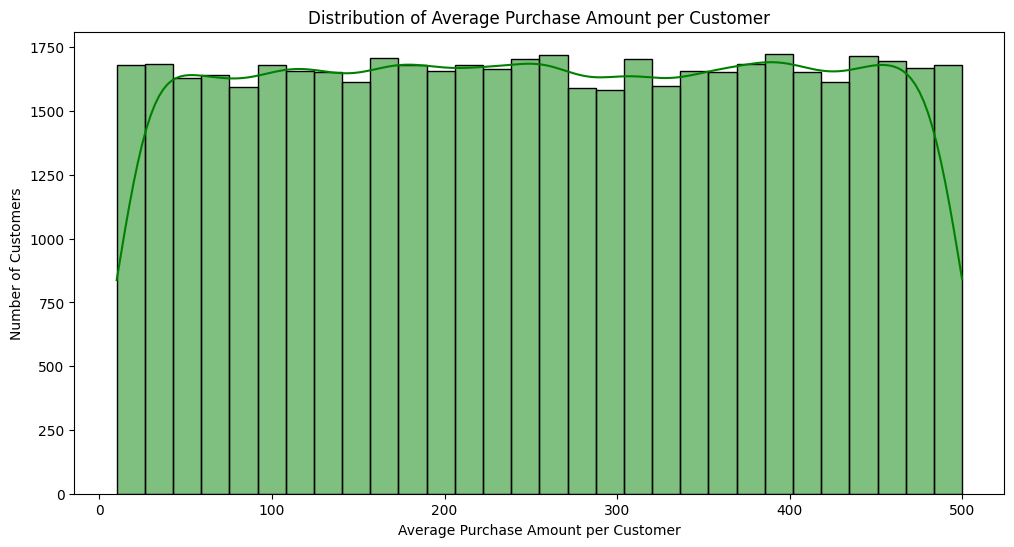

In [43]:
#Understanding the average amount spent per customer helps identify high-value customers and overall spending behavior. 
#This can be useful for targeted promotions, loyalty programs, and personalized marketing strategies.
#I will use groupby('Customer_ID').agg({'Purchase_Amount': 'mean'}) to calculate the average purchase amount per customer.
#Then, I will create a histogram to visualize the distribution of spending per customer.
#To analyze customer spending behavior, I calculated the average purchase amount per customer and visualized it using a histogram. 
#This helps understand how much customers typically spend and whether there are high-value customers who spend significantly more than others.

avg_purchase_per_customer = wp.groupby('Customer_ID')['Purchase_Amount'].mean()
plt.figure(figsize=(12, 6))
sb.histplot(avg_purchase_per_customer, bins=30, kde=True, color='g')
plt.xlabel("Average Purchase Amount per Customer")
plt.ylabel("Number of Customers")
plt.title("Distribution of Average Purchase Amount per Customer")
plt.show()

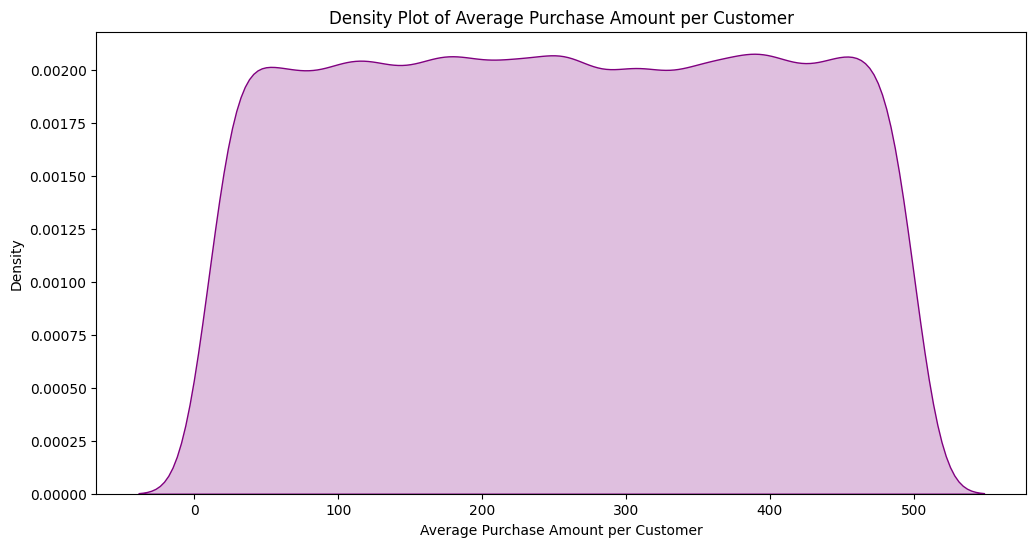

In [46]:
plt.figure(figsize=(12, 6))
sb.kdeplot(avg_purchase_per_customer, fill=True, color="purple")
plt.xlabel("Average Purchase Amount per Customer")
plt.ylabel("Density")
plt.title("Density Plot of Average Purchase Amount per Customer")
plt.show()

In [47]:
#To analyze the average purchase value per customer, I used both a histogram and a density plot (KDE plot).
#While the histogram provides a general view of the distribution, I found that the density plot (KDE) offers a clearer representation of where most customers' spending habits fall. 

#The histogram and the kde plot shows that most customers have a moderate average purchase value, but a few high-value customers spend significantly more. 
#Identifying these premium buyers can help businesses design targeted promotions to encourage repeat purchases and increase revenue.

## Step 4: Comparing the Most Profitable Categories

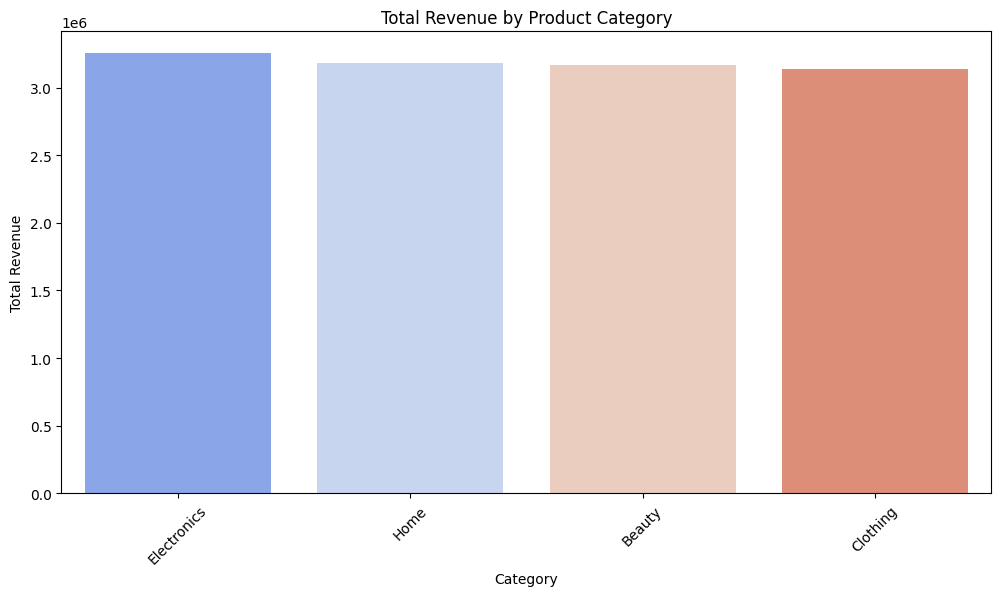

In [49]:
#It is also important to analyze which categories generate the most revenue. 
#A category with fewer purchases might still be highly profitable if its products have higher prices.
#I will use groupby('CategoryName').agg({'Purchase_Amount': 'sum'}) to calculate total revenue per category.
#Then, I will create a bar chart to compare revenue across categories.

category_revenue = wp.groupby('CategoryName')['Purchase_Amount'].sum().reset_index()
category_revenue = category_revenue.sort_values(by='Purchase_Amount', ascending=False)
plt.figure(figsize=(12, 6))
sb.barplot(x="CategoryName",y="Purchase_Amount",hue="CategoryName",data=category_revenue,palette="coolwarm",legend=False)
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Product Category")
plt.show()

In [ ]:
#To analyze which product categories generate the most revenue, I calculated the total purchase amount per category and visualized it with a bar chart. 
#This helps identify the most profitable product categories, which may differ from the most frequently purchased ones.

In [51]:
#Conclusion:
#While customers buy products across all categories almost equally, Electronics generates the most revenue, suggesting that higher-priced products contribute significantly to total sales. 
#Businesses may focus on premium electronics or high-value items in other categories to maximize profits.

## Step 5: Analyzing Sales Peaks and Seasonality

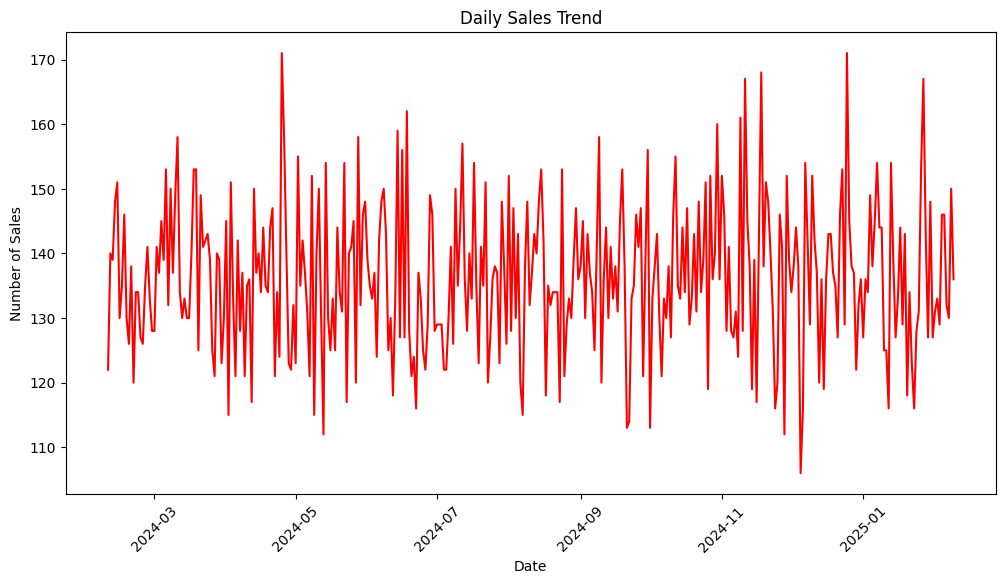

In [53]:
#Identifying sales peaks and seasonal trends helps businesses understand when customers are most active. 
#This can be used to plan promotions, stock management, and marketing campaigns at the right time.
#I will group sales by day using groupby('Purchase_Date').size() to count the number of purchases per day.
#Then, I will create a line chart to visualize sales trends over time.

daily_sales = wp.groupby('Purchase_Date').size().reset_index(name='Sales_Count')
plt.figure(figsize=(12, 6))
sb.lineplot(x=daily_sales['Purchase_Date'], y=daily_sales['Sales_Count'], color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.title("Daily Sales Trend")
plt.show()

In [54]:
#To analyze sales peaks and seasonality, I aggregated daily sales counts and visualized them using a line chart. 
#This helps identify periods of high and low customer activity, allowing businesses to optimize their strategies accordingly.

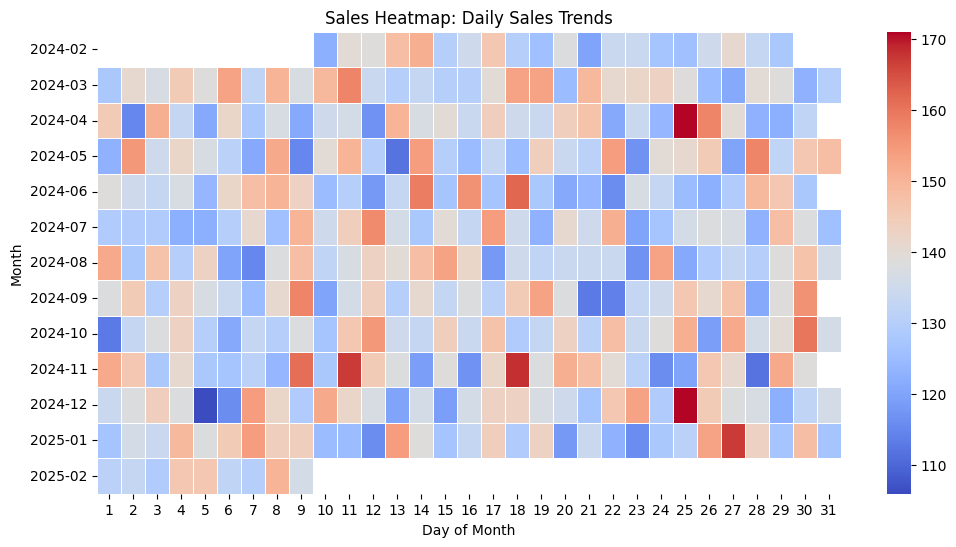

In [56]:
wp['YearMonth'] = wp['Purchase_Date'].dt.to_period("M")
wp['Day'] = wp['Purchase_Date'].dt.day
sales_heatmap = wp.groupby(['YearMonth', 'Day']).size().unstack()
plt.figure(figsize=(12, 6))
sb.heatmap(sales_heatmap, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.title("Sales Heatmap: Daily Sales Trends")
plt.show()

In [57]:
#How do sales behave during the Christmas period?
#"Is there a significant increase in purchases in December, particularly in the days leading up to Christmas?"

In [59]:
wp['Month'] = wp['Purchase_Date'].dt.month
wp['Day'] = wp['Purchase_Date'].dt.day
print(wp[['Purchase_Date', 'Month', 'Day']].head())

  Purchase_Date  Month  Day
0    2024-08-30      8   30
1    2024-12-21     12   21
2    2024-12-26     12   26
3    2024-11-04     11    4
4    2024-10-07     10    7


In [62]:
wp['Month'] = wp['Purchase_Date'].dt.month
wp['Day'] = wp['Purchase_Date'].dt.day
december_sales = wp[wp['Month'] == 12].groupby('Day')['Purchase_Amount'].sum().reset_index()

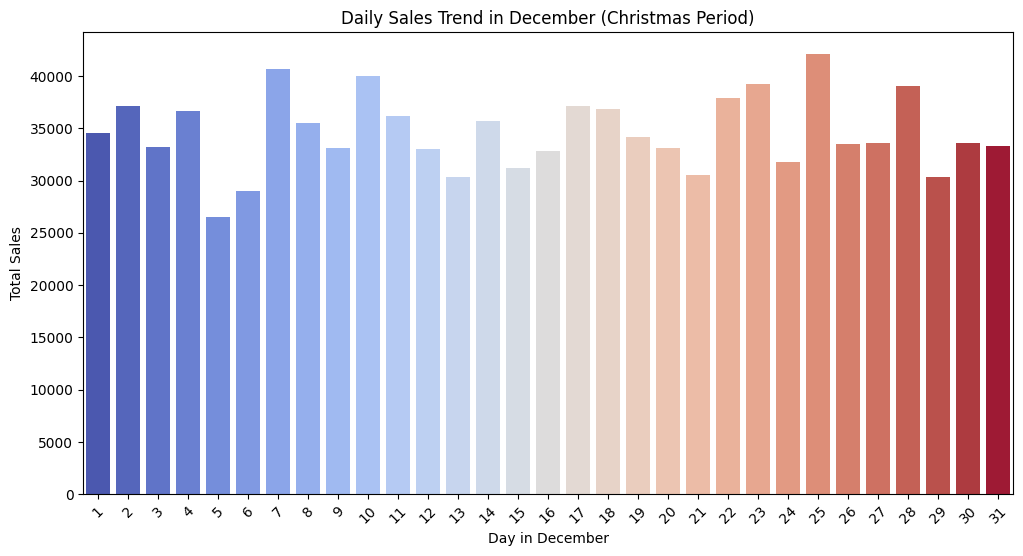

In [66]:
plt.figure(figsize=(12, 6))
sb.barplot(x="Day",y="Purchase_Amount",hue="Day",data=december_sales,palette="coolwarm",legend=False)
plt.xlabel("Day in December")
plt.ylabel("Total Sales")
plt.title("Daily Sales Trend in December (Christmas Period)")
plt.xticks(rotation=45)
plt.show()

In [68]:
#The bar chart shows daily sales in December, helping us identify how shopping behavior changes as Christmas approaches.
#Sales peak on December 25th (42,086.15), indicating strong Christmas shopping activity.
#There is a noticeable increase from December 22nd to December 25th, suggesting that many customers shop in the last days before Christmas.
#Sales remain relatively high from December 1st to December 24th, but the sharpest rise occurs in the final days before Christmas.
#After December 25th, sales drop slightly, but remain stable, meaning post-Christmas shopping is still significant.
#Conclusion:
#The data confirms that Christmas is a major sales event, with a clear sales spike in the days leading up to December 25th. 
#Businesses can use this insight to optimize promotions, inventory, and marketing efforts to maximize holiday sales.

## Step 6: Correlation Analysis

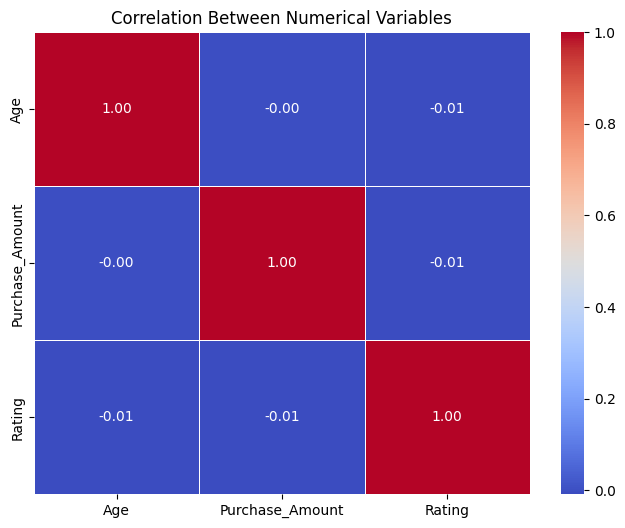

In [69]:
#Correlation analysis helps us understand relationships between numerical variables. This allows us to see how different factors influence each other, such as:
#Do older customers spend more?
#Does a higher discount lead to higher spending?
#Is there a relationship between product ratings and purchase amount?
#To explore relationships between key numerical variables, I computed the correlation matrix and visualized it using a heatmap. 
#This helps identify strong or weak relationships between customer age, purchase amount, and product ratings.

correlation_matrix = wp[['Age', 'Purchase_Amount', 'Rating']].corr()
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Numerical Variables")
plt.show()

In [73]:
#The correlation analysis shows that Age, Purchase Amount, and Rating have very weak correlations, meaning they do not significantly influence each other. 
#This suggests that customer spending and product satisfaction are independent of age and purchase value. 
#Further analysis could explore other variables (e.g., product category, discounts, or loyalty status) to find stronger relationships.

# conclusion of the analysis

This project analyzed customer purchases at Walmart to understand sales trends, spending habits, and the most profitable product categories.

- Electronics had the highest sales and revenue, showing that high-priced products play a big role in total earnings.
- Sales remained stable throughout the year, with a big increase before Christmas, especially on December 25th.
- Most customers spend within a moderate range, but a small group of high-value buyers contributes significantly.
- No strong correlation was found between age, spending, and product ratings, meaning these factors don’t influence each other much.
  
This means :

- Christmas promotions could boost sales even more.
- Targeting high-spending customers with special offers might increase profits.
- Focusing on high-value items in all categories could maximize revenue.

|This analysis shows how understanding customer behavior through data can help businesses improve sales and marketing strategies.